Sources:
http://www.kt.agh.edu.pl/~kulakowski/ml/03_Logistic_bias_variance.pdfhttps://www.simplilearn.com/tutorials/machine-learning-tutorial/logistic-regression-in-python
https://www.datacamp.com/tutorial/understanding-logistic-regression-python
https://realpython.com/logistic-regression-python/

In [426]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn import metrics

print("Libs Loaded")

Libs Loaded


https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html
Each datapoint is a 8x8 image of a digit.

https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html

In [427]:
from sklearn.datasets import load_digits
digits = load_digits()

In [428]:
print(digits.target)

[0 1 2 ... 8 9 8]


In [429]:
print("Image Data Shape" , digits.data.shape)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


In [430]:
X = digits.data
y = digits.target

In [431]:
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [432]:
y

array([0, 1, 2, ..., 8, 9, 8])

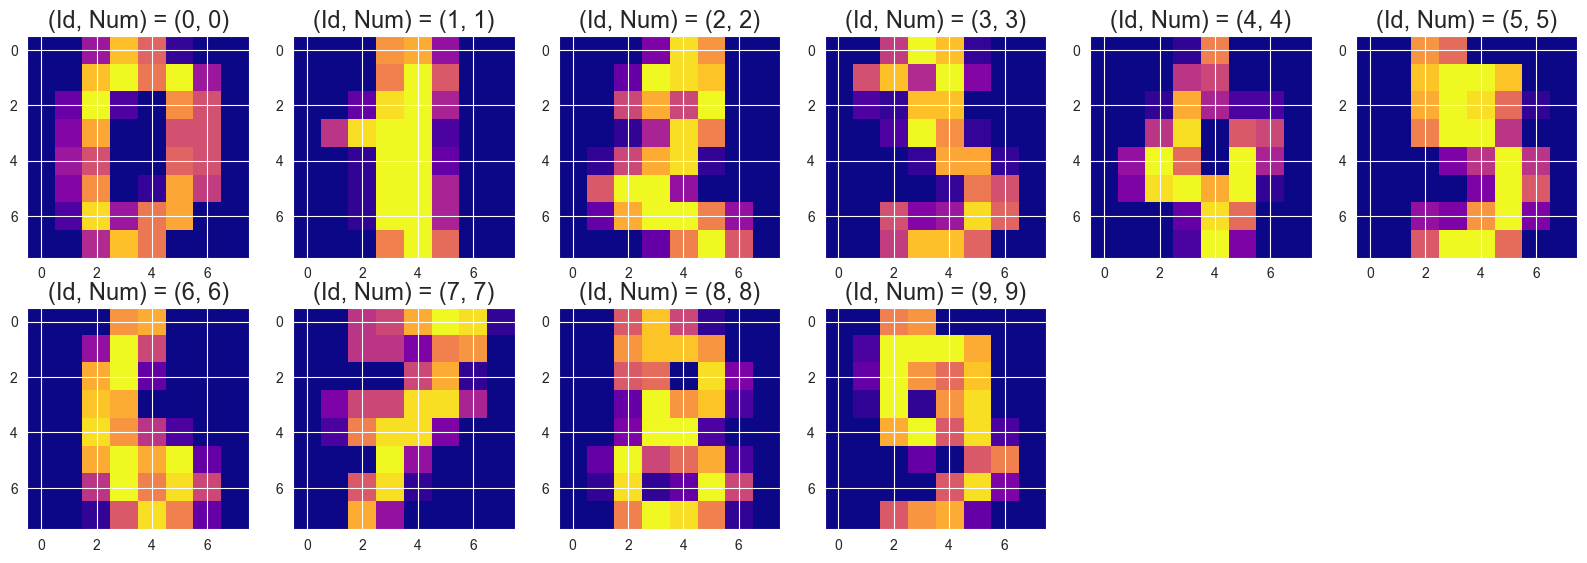

In [433]:
plt.figure(figsize=(20,10))
# https://note.nkmk.me/en/python-for-enumerate-zip/
for i, (image, label) in enumerate(zip(X[:10], y[:10])): # first 10 images than labels
     plt.subplot(3, 6, i + 1)
     plt.title(f'(Id, Num) = ({i}, {label})', fontsize=17)
     plt.imshow(np.reshape(image, (8,8)), cmap="plasma")

In [434]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [435]:
print(X_test)

[[ 0.  0.  0. ... 14.  5.  0.]
 [ 0.  0. 11. ...  1.  0.  0.]
 [ 0.  0.  8. ...  8.  0.  0.]
 ...
 [ 0.  0.  7. ... 10.  0.  0.]
 [ 0.  0.  7. ... 16.  4.  0.]
 [ 0.  0. 14. ...  5.  0.  0.]]


In [436]:
# logisticReg = LogisticRegression()
# logisticReg.fit(X_train, y_train)

Regularization is a technique used to prevent overfitting and improve the generalization ability of a model. It does this by adding a penalty term to the objective function (also called the cost function) that the model is trying to minimize. The regularization term is usually a function of the model parameters (also called weights) and it is added to the objective function to penalize large weights. This helps to reduce the complexity of the model and prevent overfitting.

Standardization is a technique used to transform the values of a feature to a standard scale. It is often used when the features have different scales and units, as this can affect the performance of some machine learning algorithms. Standardization is usually done by subtracting the mean of the feature from each value and dividing by the standard deviation. This results in a standard normal distribution with a mean of 0 and a standard deviation of 1.

In [437]:
# https://www.digitalocean.com/community/tutorials/standardscaler-function-in-python
logisticReg = make_pipeline(StandardScaler(), LogisticRegression(fit_intercept=True, penalty='l2'))
logisticReg.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [438]:
predictions = logisticReg.predict(X_test) #[:10]
"OK"

'OK'

Evaluating performance

In [439]:
score = logisticReg.score(X_test, y_test)
score
# 97%

0.9722222222222222

In [440]:
print(
    f"Classification report for classifier {logisticReg}:\n"
    f"{metrics.classification_report(y_test, predictions)}\n"
)

Classification report for classifier Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())]):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       0.97      0.97      0.97        34
           4       1.00      0.98      0.99        46
           5       0.94      0.94      0.94        47
           6       0.97      0.97      0.97        35
           7       1.00      0.97      0.99        34
           8       0.97      0.97      0.97        30
           9       0.93      0.95      0.94        40

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360




A confusion matrix is a table that is used to evaluate the performance of a classification model. It is a summary of the model's prediction results on a set of test data for which the true values are known.

In [441]:
conf_mat = metrics.confusion_matrix(y_test, predictions)
conf_mat

array([[33,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 28,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 33,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 33,  0,  1,  0,  0,  0,  0],
       [ 0,  1,  0,  0, 45,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 44,  1,  0,  0,  2],
       [ 0,  0,  0,  0,  0,  1, 34,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 33,  0,  1],
       [ 0,  0,  0,  0,  0,  1,  0,  0, 29,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  1, 38]], dtype=int64)

Text(0.5, 80.7222222222222, 'PREDICTED')

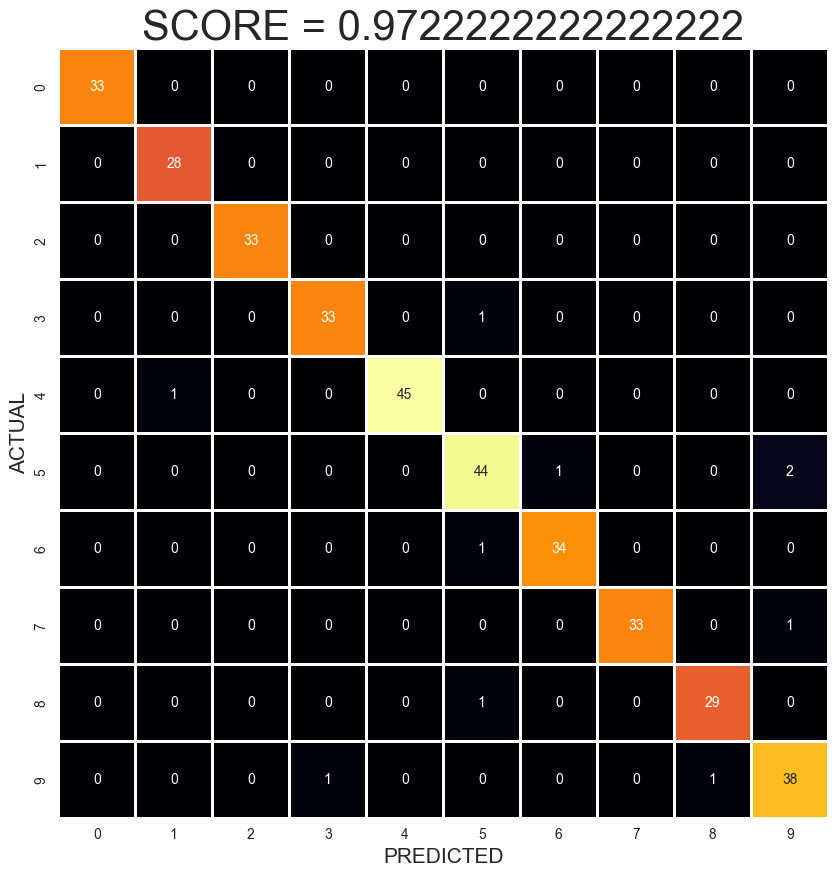

In [442]:
plt.figure(figsize=(10, 10))
sns.heatmap(conf_mat, annot=True, square=True, linewidths=.8, cmap='inferno', cbar=False)
plt.title(f'SCORE = {score}', size=30, loc='center')
plt.ylabel('ACTUAL',size=15)
plt.xlabel('PREDICTED', size=15)

In [443]:
wrong_indexes = []
for _id, (predict, actual) in enumerate(zip(predictions, y_test)):
     if predict != actual: wrong_indexes.append(_id)

In [444]:
wrong_indexes
# [52, 71, 133, 149, 159, 222, 234, 239, 244, 339]

[52, 71, 133, 149, 159, 222, 234, 239, 244, 339]

In [445]:
y_test

array([6, 9, 3, 7, 2, 1, 5, 2, 5, 2, 1, 9, 4, 0, 4, 2, 3, 7, 8, 8, 4, 3,
       9, 7, 5, 6, 3, 5, 6, 3, 4, 9, 1, 4, 4, 6, 9, 4, 7, 6, 6, 9, 1, 3,
       6, 1, 3, 0, 6, 5, 5, 1, 9, 5, 6, 0, 9, 0, 0, 1, 0, 4, 5, 2, 4, 5,
       7, 0, 7, 5, 9, 5, 5, 4, 7, 0, 4, 5, 5, 9, 9, 0, 2, 3, 8, 0, 6, 4,
       4, 9, 1, 2, 8, 3, 5, 2, 9, 0, 4, 4, 4, 3, 5, 3, 1, 3, 5, 9, 4, 2,
       7, 7, 4, 4, 1, 9, 2, 7, 8, 7, 2, 6, 9, 4, 0, 7, 2, 7, 5, 8, 7, 5,
       7, 7, 0, 6, 6, 4, 2, 8, 0, 9, 4, 6, 9, 9, 6, 9, 0, 3, 5, 6, 6, 0,
       6, 4, 3, 9, 3, 9, 7, 2, 9, 0, 4, 5, 3, 6, 5, 9, 9, 8, 4, 2, 1, 3,
       7, 7, 2, 2, 3, 9, 8, 0, 3, 2, 2, 5, 6, 9, 9, 4, 1, 5, 4, 2, 3, 6,
       4, 8, 5, 9, 5, 7, 8, 9, 4, 8, 1, 5, 4, 4, 9, 6, 1, 8, 6, 0, 4, 5,
       2, 7, 4, 6, 4, 5, 6, 0, 3, 2, 3, 6, 7, 1, 5, 1, 4, 7, 6, 8, 8, 5,
       5, 1, 6, 2, 8, 8, 9, 9, 7, 6, 2, 2, 2, 3, 4, 8, 8, 3, 6, 0, 9, 7,
       7, 0, 1, 0, 4, 5, 1, 5, 3, 6, 0, 4, 1, 0, 0, 3, 6, 5, 9, 7, 3, 5,
       5, 9, 9, 8, 5, 3, 3, 2, 0, 5, 8, 3, 4, 0, 2,

In [446]:
predictions

array([6, 9, 3, 7, 2, 1, 5, 2, 5, 2, 1, 9, 4, 0, 4, 2, 3, 7, 8, 8, 4, 3,
       9, 7, 5, 6, 3, 5, 6, 3, 4, 9, 1, 4, 4, 6, 9, 4, 7, 6, 6, 9, 1, 3,
       6, 1, 3, 0, 6, 5, 5, 1, 3, 5, 6, 0, 9, 0, 0, 1, 0, 4, 5, 2, 4, 5,
       7, 0, 7, 5, 9, 9, 5, 4, 7, 0, 4, 5, 5, 9, 9, 0, 2, 3, 8, 0, 6, 4,
       4, 9, 1, 2, 8, 3, 5, 2, 9, 0, 4, 4, 4, 3, 5, 3, 1, 3, 5, 9, 4, 2,
       7, 7, 4, 4, 1, 9, 2, 7, 8, 7, 2, 6, 9, 4, 0, 7, 2, 7, 5, 8, 7, 5,
       7, 9, 0, 6, 6, 4, 2, 8, 0, 9, 4, 6, 9, 9, 6, 9, 0, 5, 5, 6, 6, 0,
       6, 4, 3, 9, 3, 8, 7, 2, 9, 0, 4, 5, 3, 6, 5, 9, 9, 8, 4, 2, 1, 3,
       7, 7, 2, 2, 3, 9, 8, 0, 3, 2, 2, 5, 6, 9, 9, 4, 1, 5, 4, 2, 3, 6,
       4, 8, 5, 9, 5, 7, 8, 9, 4, 8, 1, 5, 4, 4, 9, 6, 1, 8, 6, 0, 4, 5,
       2, 7, 1, 6, 4, 5, 6, 0, 3, 2, 3, 6, 7, 1, 9, 1, 4, 7, 6, 5, 8, 5,
       5, 1, 5, 2, 8, 8, 9, 9, 7, 6, 2, 2, 2, 3, 4, 8, 8, 3, 6, 0, 9, 7,
       7, 0, 1, 0, 4, 5, 1, 5, 3, 6, 0, 4, 1, 0, 0, 3, 6, 5, 9, 7, 3, 5,
       5, 9, 9, 8, 5, 3, 3, 2, 0, 5, 8, 3, 4, 0, 2,

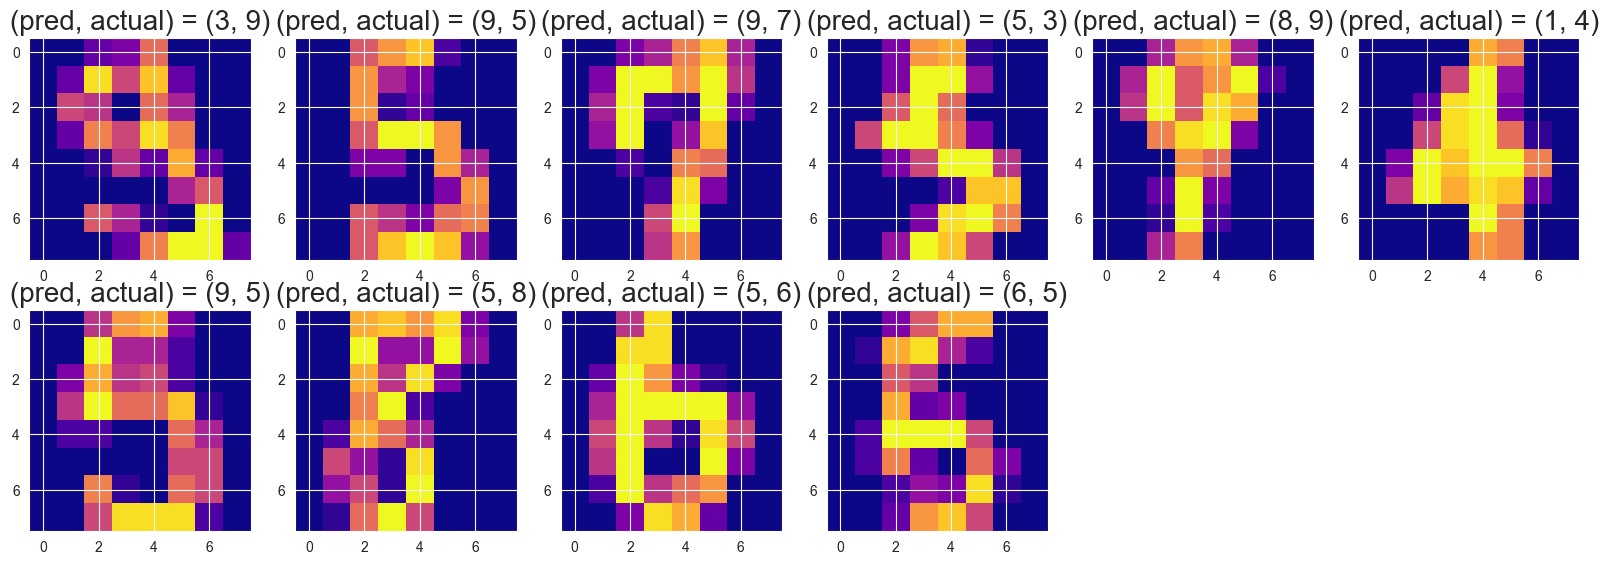

In [447]:
plt.figure(figsize=(20,10))
for _id, wrong in enumerate(wrong_indexes[:10]):
     plt.subplot(3, 6, _id + 1)
     plt.title(f'(pred, actual) = ({predictions[wrong]}, {y_test[wrong]})', fontsize = 20)
     plt.imshow(np.reshape(X_test[wrong], (8,8)), cmap='plasma')